In [31]:
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sb 
import matplotlib.pyplot as pt

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

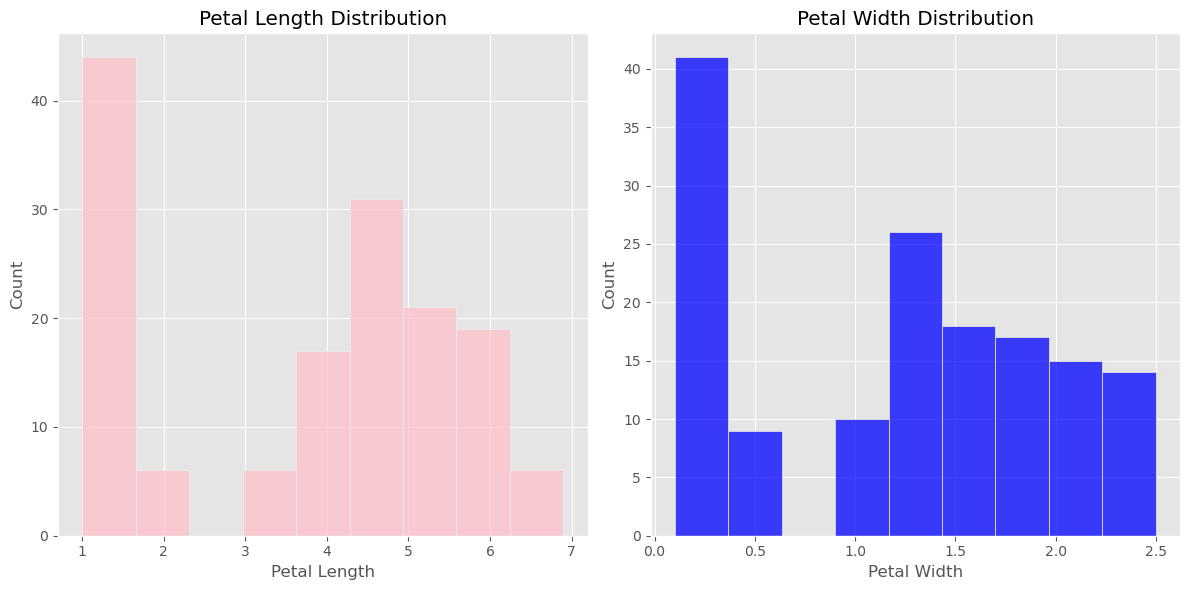

In [16]:


# Create a figure with two subplots using pt.subplots()
fig, (ax1, ax2) = pt.subplots(1, 2, figsize=(12, 6))

# Plotting the first histogram
sb.histplot(data=df, x='Petal.Length', color='pink', ax=ax1)
ax1.set_title('Petal Length Distribution')
ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Count')

# Plotting the second histogram
sb.histplot(data=df, x='Petal.Width', color='blue', ax=ax2)
ax2.set_title('Petal Width Distribution')
ax2.set_xlabel('Petal Width')
ax2.set_ylabel('Count')

# Adjust layout and display the plot
pt.tight_layout()
pt.show()


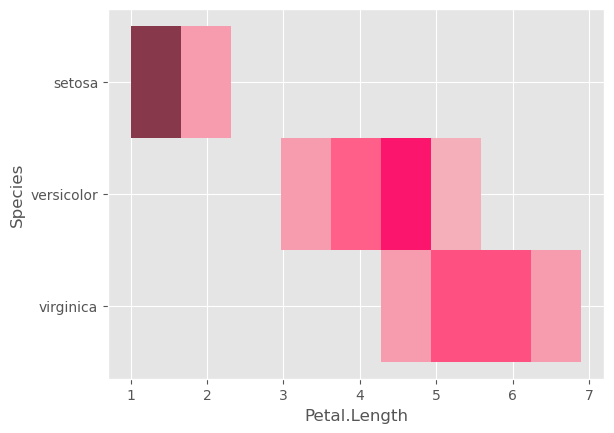

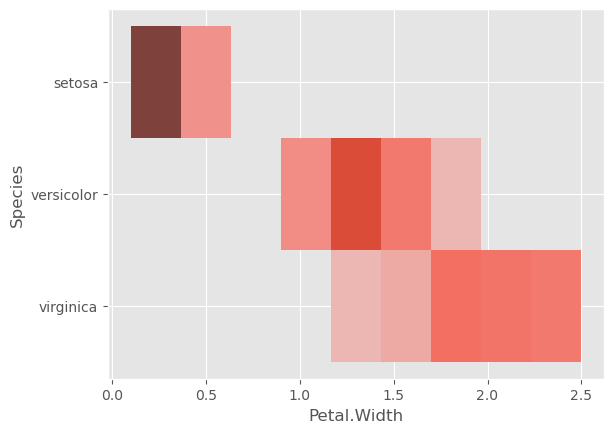

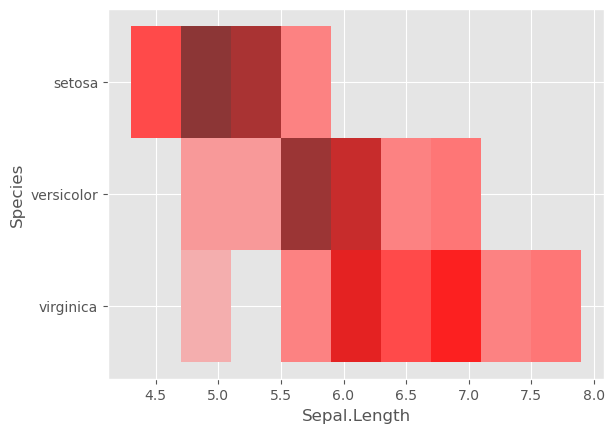

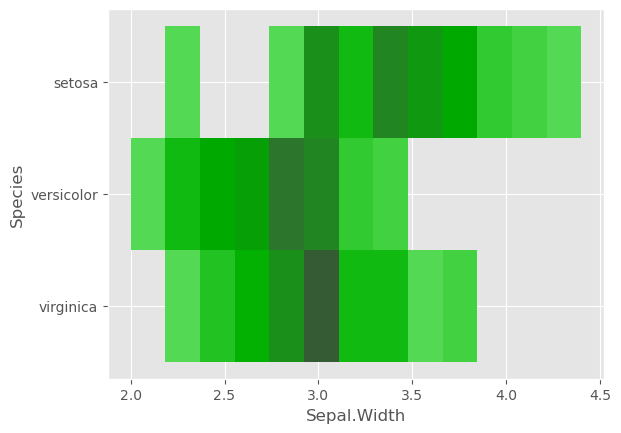

In [19]:
sb.histplot(data=df, x = 'Petal.Length', y = 'Species', color = 'pink')
pt.show()
sb.histplot(data=df, x = 'Petal.Width', y = 'Species')
pt.show()
sb.histplot(data=df, x = 'Sepal.Length', y = 'Species', color = 'maroon')
pt.show()
sb.histplot(data=df, x = 'Sepal.Width', y = 'Species', color = 'green')
pt.show()

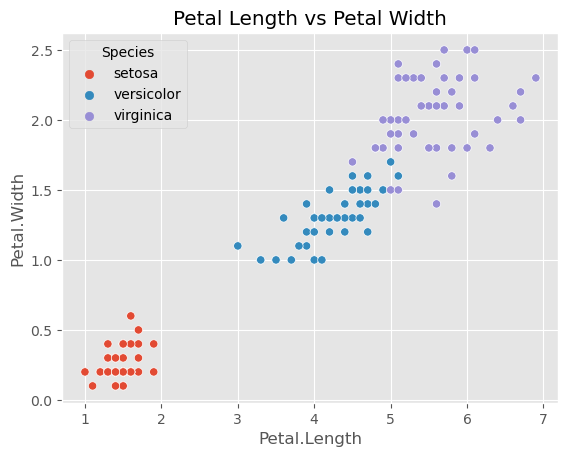

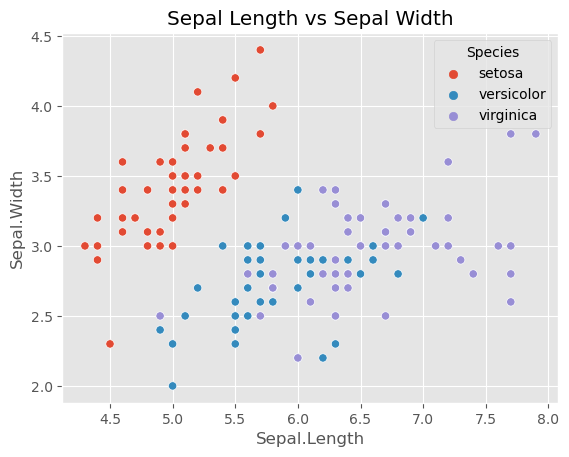

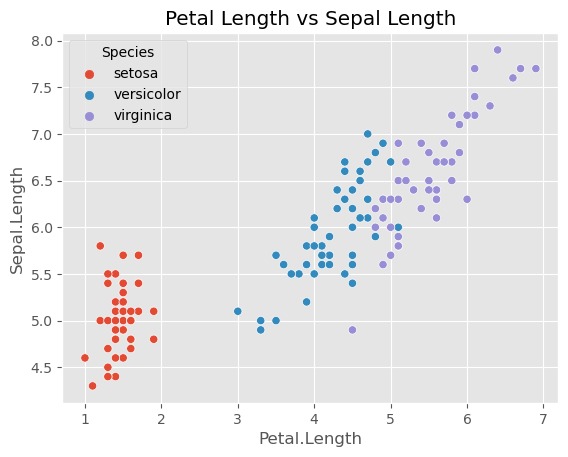

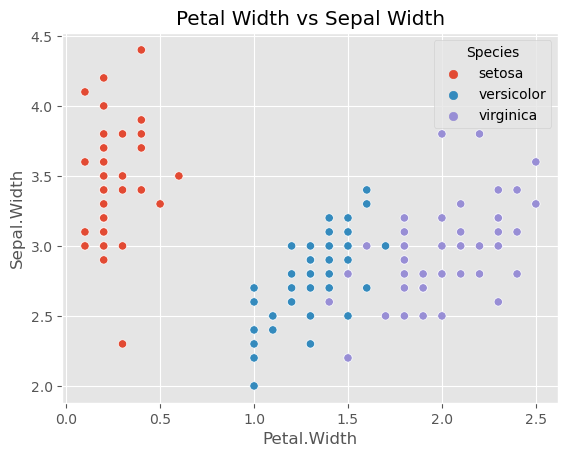

In [20]:
sb.scatterplot(x='Petal.Length', y='Petal.Width', hue='Species', data=df)
pt.title('Petal Length vs Petal Width')
pt.show()

sb.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='Species', data=df)
pt.title('Sepal Length vs Sepal Width')
pt.show()

sb.scatterplot(x='Petal.Length', y='Sepal.Length', hue='Species', data=df)
pt.title('Petal Length vs Sepal Length')
pt.show()

sb.scatterplot(x='Petal.Width', y='Sepal.Width', hue='Species', data=df)
pt.title('Petal Width vs Sepal Width')
pt.show()

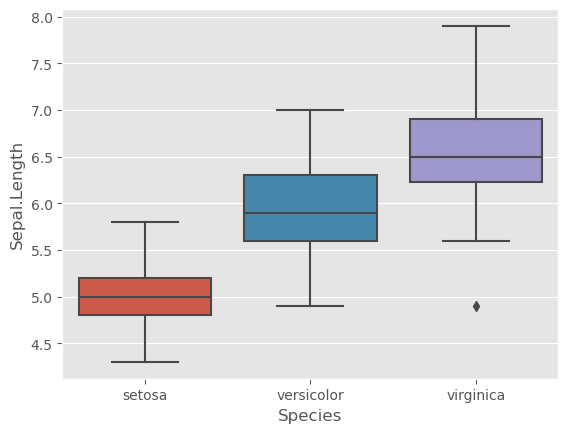

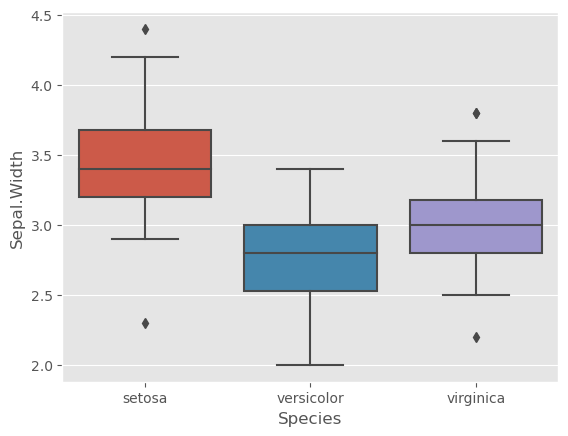

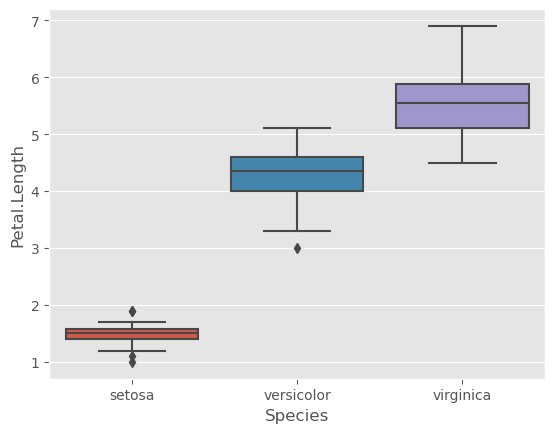

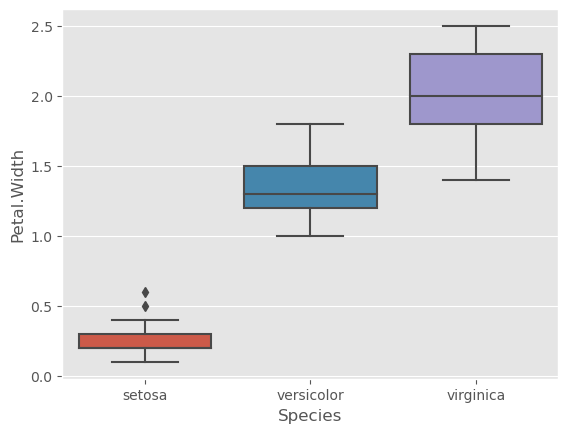

In [21]:
sb.boxplot(data=df,x='Species', y='Sepal.Length')
pt.show()
sb.boxplot(data=df,x='Species', y='Sepal.Width')
pt.show()
sb.boxplot(data=df,x='Species', y='Petal.Length')
pt.show()
sb.boxplot(data=df,x='Species', y='Petal.Width')
pt.show()

In [23]:
X = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']] #df.drop('species', axis=1)
y = df['Species']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)

In [26]:
mlp.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)

In [27]:
y_pred = mlp.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [30]:
pl = float(input('Enter petal length: '))
pw = float(input('Enter petal width: '))
sl = float(input('Enter sepal length: '))
sw = float(input('Enter sepal width: '))
print('The predicted iris flower is:' ,str(mlp.predict([[pl, pw, sl, sw]])[0]))

Enter petal length: 5.0
Enter petal width: 3.2
Enter sepal length: 1.6
Enter sepal width: 0.4
The predicted iris flower is: setosa


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
